In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cd /content/drive/MyDrive/Hl_phd

In [3]:
!pip install pycaret

     |████████████████████████████████| 266 kB 5.4 MB/s 
     |████████████████████████████████| 86 kB 5.0 MB/s 
     |████████████████████████████████| 1.7 MB 37.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 261 kB 41.8 MB/s 
     |████████████████████████████████| 113 kB 46.6 MB/s 
     |████████████████████████████████| 6.8 MB 35.6 MB/s 
     |████████████████████████████████| 167 kB 47.2 MB/s 
     |████████████████████████████████| 2.0 MB 20.8 MB/s 
     |████████████████████████████████| 16.9 MB 45 kB/s 
     |████████████████████████████████| 56 kB 4.4 MB/s 
     |████████████████████████████████| 271 kB 41.8 MB/s 
     |████████████████████████████████| 1.3 MB 34.1 MB/s 
     |████████████████████████████████| 3.1 MB 34.8 MB/s 
     |████████████████████████████████| 10.1 MB 39.5 MB/s 
     |██████████████████

In [5]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [6]:
import pandas as pd

In [7]:
dataset = pd.read_csv('/content/drive/MyDrive/Hl_phd/export_dataframe_prod2.csv')

In [8]:
dataset.shape

(2195, 11)

In [9]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (1976, 11)
Unseen Data For Predictions (219, 11)


In [10]:
from pycaret.regression import *


In [11]:
dataset.columns


Index(['subsite_store', 'shipment_state', 'total', 'currency', 'bill_city',
       'bill_zipcode', 'bill_country_iso_name', 'quantity', 'completed_year',
       'completed_month', 'completed_day'],
      dtype='object')

In [12]:
exp_reg102 = setup(data = data, target = 'total', session_id=123)

,Description,Value
0,session_id,123
1,Target,total
2,Original Data,"(1976, 11)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,9
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1383, 1405)"


In [13]:
best = compare_models(exclude = ['ransac'])


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
llar,Lasso Least Angle Regression,359.7169,1.335662e+06,837.7018,0.0787,0.6390,0.6748,0.373
knn,K Neighbors Regressor,389.5920,1.428227e+06,898.6604,0.0740,0.6724,0.6781,0.251
huber,Huber Regressor,364.5887,1.487351e+06,945.1320,0.0558,0.6317,0.5578,4.492
en,Elastic Net,416.6071,1.538858e+06,969.4020,0.0125,0.7121,0.8401,0.058
lasso,Lasso Regression,352.1603,1.336637e+06,847.3341,0.0057,0.6079,0.5977,0.067
lightgbm,Light Gradient Boosting Machine,426.1729,1.434967e+06,925.5590,-0.0055,0.7276,0.7568,0.200
br,Bayesian Ridge,419.0208,1.493963e+06,969.3059,-0.0081,0.7169,0.8557,4.493
par,Passive Aggressive Regressor,386.9530,1.568204e+06,985.9443,-0.0248,0.7712,0.5424,0.246
rf,Random Forest Regressor,312.9187,1.327138e+06,846.0640,-0.0690,0.5502,0.4115,14.093
dt,Decision Tree Regressor,325.8282,1.353228e+06,850.8774,-0.0802,0.6239,0.4621,0.491


In [15]:

knn = create_model('knn')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,317.3269,2.420262e+05,491.9616,-0.3915,0.6350,0.6501
1,300.9874,2.284097e+05,477.9222,0.2139,0.7285,0.9227
2,367.3172,4.754691e+05,689.5427,0.0332,0.7177,0.7495
3,349.9435,4.080658e+05,638.8003,0.5599,0.6283,0.6426
4,405.7072,7.562189e+05,869.6085,-0.9334,0.6753,0.5907
5,384.2944,5.590932e+05,747.7253,0.3627,0.5909,0.5528
6,305.2041,2.618135e+05,511.6771,0.5932,0.5766,0.5852
7,373.0099,4.115233e+05,641.5009,0.4987,0.6725,0.6690
8,385.6458,4.641368e+05,681.2758,-0.1883,0.6901,0.7046
9,706.4832,1.047551e+07,3236.5896,-0.0089,0.8092,0.7136


In [16]:

print(knn)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                    weights='uniform')


In [18]:
tuned_knn = tune_model(knn)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,290.6579,1.891541e+05,434.9185,-0.0875,0.6101,0.6600
1,289.4181,1.576376e+05,397.0360,0.4575,0.7720,1.0972
2,329.2199,3.082019e+05,555.1593,0.3733,0.7100,0.8346
3,264.5717,1.334888e+05,365.3612,0.8560,0.5717,0.6137
4,394.7494,4.374266e+05,661.3823,-0.1183,0.6711,0.6615
5,299.8373,1.737292e+05,416.8084,0.8020,0.5420,0.5586
6,253.4684,1.102102e+05,331.9793,0.8288,0.5555,0.6099
7,331.5236,2.675670e+05,517.2688,0.6740,0.6456,0.7031
8,345.4497,3.736817e+05,611.2951,0.0433,0.6715,0.7454
9,609.4757,1.013330e+07,3183.2838,0.0241,0.7542,0.7179


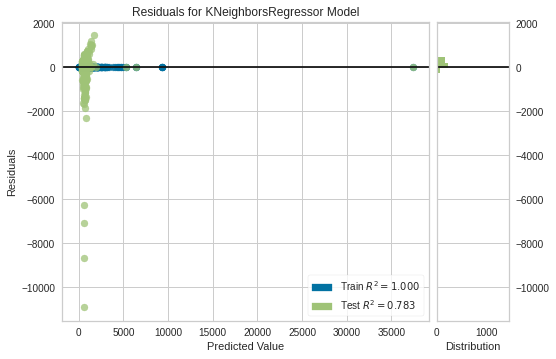

In [19]:
plot_model(tuned_knn)

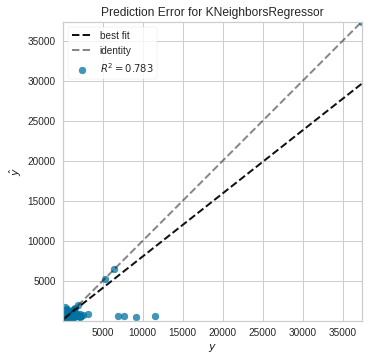

In [20]:
plot_model(tuned_knn, plot = 'error')

In [24]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [25]:
predict_model(tuned_knn);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,352.3597,654551.0307,809.0433,0.7826,0.6843,0.763


In [26]:
unseen_predictions = predict_model(tuned_knn, data=data_unseen)
unseen_predictions.head()

,subsite_store,shipment_state,total,currency,bill_city,bill_zipcode,bill_country_iso_name,quantity,completed_year,completed_month,completed_day,Label
0,Klippkungen,ready,1632.0,SEK,TIMMELE,52392,SE,1,2018,6,17,769.566988
1,Klippkungen,shipped,982.4,SEK,Västerljung,61075,SE,1,2018,7,3,643.854875
2,Klippkungen,shipped,357.0,SEK,Uddevalla,45161,SE,1,2018,12,9,754.531464
3,Klippkungen,ready,2457.0,SEK,Uppsala,75244,SE,1,2019,5,10,519.412055
4,Klippkungen,shipped,623.0,SEK,Vattholma,74350,SE,1,2018,5,22,619.030922


In [27]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.total, unseen_predictions.Label, 'R2')

0.1879